In [57]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
from collections import defaultdict

78.0


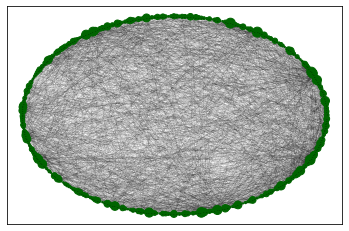

In [70]:
circlesF = open("../dataset/0.circles","r")
edgesF = open("../dataset/0.edges","r")
featsF = open("../dataset/0.feat","r")
featnamesF = open("../dataset/0.featnames","r")

G = nx.Graph()

#Getting every circle in the network:
circles = []
for line in circlesF:
    scircle = line.split()
    icircle = []
    for j in range(1,len(scircle)):
        icircle.append(int(scircle[j]))
    circles.append(icircle)

# There are 148 colors.
colors = ['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque',
 'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate',
  'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 
  'darkgray', 'darkgreen', 'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 
  'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 
  'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dimgrey',
   'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite',
    'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred', 
    'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue',
     'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgray', 'lightgreen', 'lightgrey', 
     'lightpink', 'lightsalmon', 'lightseagreen', 'lightskyblue', 'lightslategray', 'lightslategrey', 
     'lightsteelblue', 'lightyellow', 'lime', 'limegreen', 'linen', 'magenta', 'maroon', 
     'mediumaquamarine', 'mediumblue', 'mediumorchid', 'mediumpurple', 'mediumseagreen', 
     'mediumslateblue', 'mediumspringgreen', 'mediumturquoise', 'mediumvioletred', 'midnightblue',
      'mintcream', 'mistyrose', 'moccasin', 'navajowhite', 'navy', 'oldlace', 'olive', 'olivedrab',
       'orange', 'orangered', 'orchid', 'palegoldenrod', 'palegreen', 'paleturquoise', 'palevioletred', 
       'papayawhip', 'peachpuff', 'peru', 'pink', 'plum', 'powderblue', 'purple', 'rebeccapurple', 'red',
        'rosybrown', 'royalblue', 'saddlebrown', 'salmon', 'sandybrown', 'seagreen', 'seashell', 'sienna',
         'silver', 'skyblue', 'slateblue', 'slategray', 'slategrey', 'snow', 'springgreen', 'steelblue', 'tan', 'teal', 'thistle', 'tomato', 'turquoise', 'violet', 'wheat', 'white', 'whitesmoke','yellow', 'yellowgreen']

featnames = []
for line in featnamesF:
    splittedLine = line.split()
    word = ""
    for j in range(1,len(splittedLine)-1):
        word += splittedLine[j] + " "
    word += splittedLine[len(splittedLine)-1]
    featnames.append(word)

i = 1

for line in featsF:
    G.add_node(i)
    splittedLine = line.split()
    j = 1
    for featname in featnames:
        G.nodes[i][featname] = int(splittedLine[j])
        j += 1
    i += 1

for line in edgesF:
    words = line.split()
    e1 = int(words[0])
    e2 = int(words[1])
    G.add_edge(e1,e2)

popularity = [1.0] * len(G.nodes())

for edge in G.edges():
    popularity[edge[0]-1] += 1
    popularity[edge[1]-1] += 1

maxElem = max(popularity)
print(maxElem)
for j in range(len(popularity)):
    popularity[j] /= (maxElem / 10)

i = 1
for pop in popularity:
    G.nodes[i]["popularity"] = pop
    i += 1

posG = nx.circular_layout(G)  # positions for all nodes

labels = {}
for g in range(1,len(G.nodes())):
    labels[g] = g

popularity = np.array(popularity)

nx.draw_networkx(G,
                 pos=posG,
                 label="Social Circles",
                 labels=labels,
                 with_labels=True,
                 font_size=1,
                 width=0.05,
                 node_color=random.choice(colors),
                 node_size=popularity * 10
                 )

plt.show()

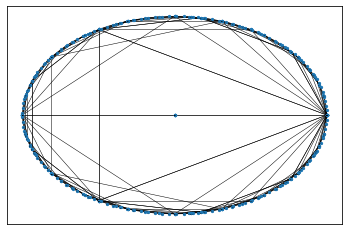

In [71]:
for circle in circles:
    g = nx.cycle_graph(circle)
    posg = nx.circular_layout(g)

    nx.draw_networkx(g,
                     pos=posg,
                     #labels=labels,
                     #with_labels=True,
                     font_size=1,
                     width=0.5,
                     #node_color=[nx.get_node_attributes(G,'color')[g] for g in G.nodes()],
                     node_size=5
                     )

plt.show()

In [67]:
#Closing files:
circlesF.close()
edgesF.close()
featnamesF.close()
featsF.close()